In [1]:
#importing libraries
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, normalize
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

KMeans clustering

In [2]:
x = np.array([[5,3], [10,15], [15,12], [24,10], [30,45], [85,70], [71,80], [60,78], [55,52], [80,91]])
kmeans = KMeans(n_clusters=2)
kmeans.fit(x)
p1 = kmeans.predict([[6,8], [4,4]])
print(
    f'Predicted values : {p1}',
    f'Cluster centers : {kmeans.cluster_centers_}'
)

Predicted values : [0 0] Cluster centers : [[16.8 17. ]
 [70.2 74.2]]


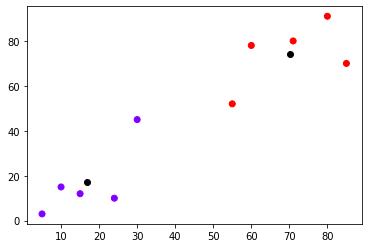

In [3]:
plt.scatter(x[:,0],x[:,1], c = kmeans.labels_, cmap = 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = 'black')

Agglometrive Clustering

In [4]:
data = pd.read_csv('aggl.csv')
x = data.iloc[:, [3, 4]].values

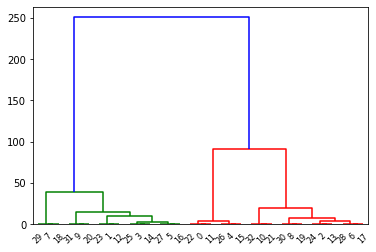

In [5]:
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))

In [6]:
model = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage = "ward")
model.fit(x)
labels = model.labels_
print(f'Labels : {labels}')

Labels : [2 0 1 0 2 0 1 3 1 0 4 2 0 1 0 2 0 1 3 1 0 4 2 0 1 0 2 0 1 3 1 0 4]


In [7]:
X = pd.read_csv("credit.csv")
X = X.drop('CUST_ID', axis = 1)
X.fillna(method="ffill", inplace=True)

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_normalized = normalize(X_scaled)
X_normalized = pd.DataFrame(X_normalized)

In [9]:
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

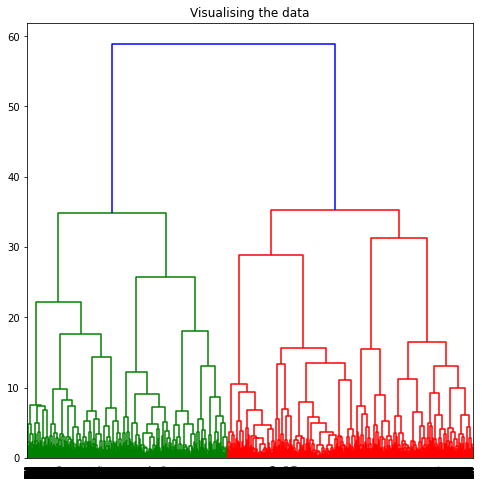

In [10]:
plt.figure(figsize = (8,8))
plt.title('Visualising the data')
Dendrogram = sch.dendrogram((sch.linkage(X_normalized, method = 'ward')))

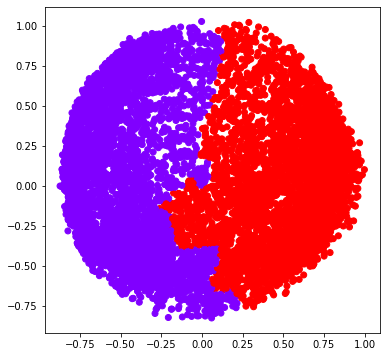

In [11]:
ac2 = AgglomerativeClustering(n_clusters = 2)
plt.figure(figsize=(6,6))
plt.scatter(X_principal['P1'], X_principal['P2'],
           c = ac2.fit_predict(X_principal), cmap = 'rainbow')
plt.show()

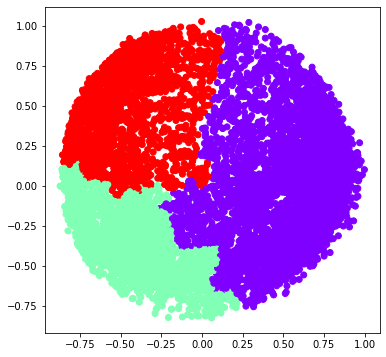

In [12]:
ac2 = AgglomerativeClustering(n_clusters = 3)
plt.figure(figsize=(6,6))
plt.scatter(X_principal['P1'], X_principal['P2'],
           c = ac2.fit_predict(X_principal), cmap = 'rainbow')
plt.show()

Dencity based spatial clustering of applications with noise

In [13]:
X = pd.read_csv("credit.csv")
X = X.drop('CUST_ID', axis = 1)
X.fillna(method = 'ffill', inplace = True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_normalized = normalize(X_scaled)
X_normalized = pd.DataFrame(X_normalized)

In [14]:
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
db = DBSCAN(eps = 0.3, min_samples = 5)

db.fit(X_normalized)
labels = db.labels_
print(f'Labels : {labels}')
print(f'Ordered Labels : {set(labels)}')

Labels : [ 0 -1  0 ...  0  0  0]
Ordered Labels : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, -1}


In [15]:
db.fit(X_principal)
labels = db.labels_
print(f'Labels : {labels}')
print(f'Ordered Labels : {set(labels)}')

Labels : [0 0 0 ... 0 0 0]
Ordered Labels : {0}
